# Análise exploratória de dados - Atividade 5

In [230]:
#importar as libs
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## 1. Leitura inicial dos dados

In [116]:
#importando o conjunto de dados
df =pd.read_csv('../data/raw/data.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Descrição dos conjunto de dados

O conjunto de dados **Tips** é uma coleção de dados que documenta informações sobre contas e gorjetas em um restaurante, coletadas pelo garçom. Este dataset é frequentemente utilizado para realizar análises estatísticas e criar visualizações de dados, permitindo a exploração de diversos fatores que podem influenciar a generosidade das gorjetas dadas pelos clientes.

### 2.1 Dicionário de dados

In [121]:
dicionario = pd.read_csv("../data/external/dictionary.csv")
dicionario

,variavel,descricao,tipo,subtipo
0,total_bill,Valor total da conta,Quantitativa,Contínua
1,tip,Valor da gorjeta,Quantitativa,Contínua
2,sex,"Gênero do cliente pagante (Male = Masculino, F...",Qualitativa,Nominal
3,smoker,Informa se algum cliente da mesa é fumante (Ye...,Qualitativa,Nominal
4,day,Dia da semana em que ocorreu o serviço,Qualitativa,Nominal
5,time,Horário em que ocorreu o serviço (Lunch = Almo...,Qualitativa,Nominal
6,size,Quantidade de pessoas na mesa (1-6),Quantitativa,Discreta


- Conjunto com 7 variáveis, com 4 qualitativas nominais e 3 quantitativas, sendo 2 contínuas e 1 discreta

In [124]:
#informacões básicas
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [126]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

- Total de 244 linhas
- Nenhum valor faltante.

## 3. Perguntas de partida e hipóteses

- Qual é a relação entre o valor total da conta (total_bill) e o valor da gorjeta (tip)?
- O tamanho do grupo afeta no valor da gorjeta?
- Homens ou mulheres tendem a dar gorjetas maiores?
- Qual dia da semana recebe a maior média de gorjetas? Como o final de semana é afetado?
- Existe uma diferença significativa entre o valor da gorjeta no almoço e no jantar? Isso permanece da mesma forma no final de semana?
- Clientes fumantes dão gorjetas diferentes em comparação com clientes não fumantes?

### Qual é a relação entre o valor total da conta (total_bill) e o valor da gorjeta (tip)?


<Axes: >

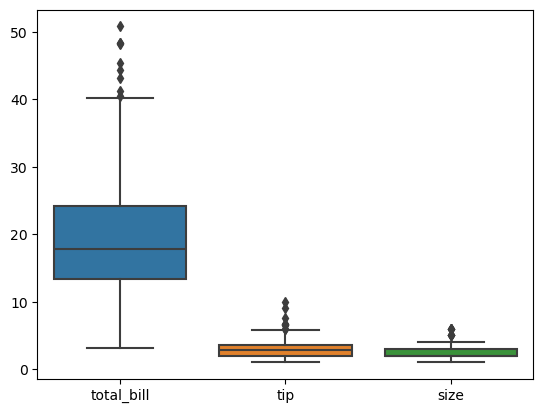

In [163]:
#identificação de outliers para entender qual correlação utilizar
sns.boxplot(df)

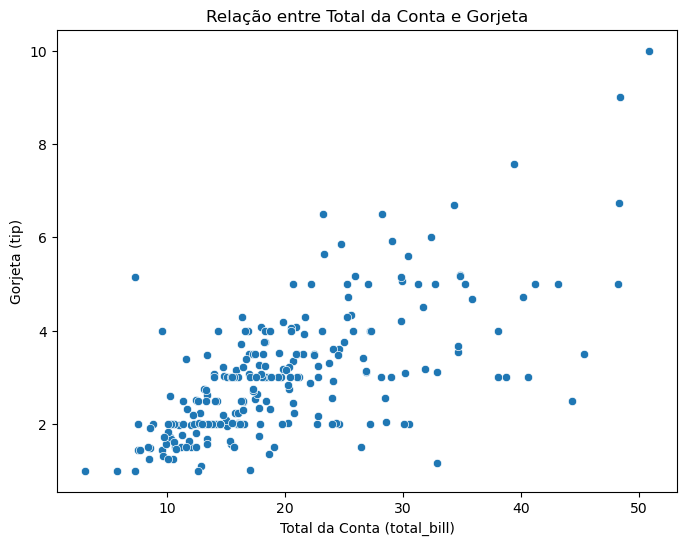

In [168]:
#scatter plot para relação de linearidade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Relação entre Total da Conta e Gorjeta')
plt.xlabel('Total da Conta (total_bill)')
plt.ylabel('Gorjeta (tip)')
plt.show()

- Gráfico indica correlação positiva, mas a partir de certo valor ele perde a linearidade.
- Pode haver variações na forma exata da relação, mas a tendência geral é que aumentos no valor da conta estão associados a aumentos no valor da gorjeta.

In [146]:
df.select_dtypes(include=['float64','int64']).head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [154]:
#criando um novo dataframe só com variáveis quantitativas
df_filter = df.select_dtypes(include=['float64','int64']).copy()

### Sobre a Correlação de Spearman
- Correlação de Spearman é para valores lineares ou não-linerares
- Essa medida é uma alternativa à correlação de Pearson quando os dados não seguem uma distribuição normal ou quando há uma relação não linear entre as variáveis.
- A correlação de Spearman avalia a associação monotônica entre duas variáveis, ou seja, se, quando uma variável aumenta, a outra tende a aumentar ou diminuir consistentemente.
- Ela não assume a linearidade da relação e é mais robusta a outliers. 

In [161]:
#correlação de Spearman
df_filter.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


### Análise
- Um coeficiente de correlação de Spearman de 0.678968 indica uma forte relação monótona positiva entre total_bill e tip.
- Isso significa que, **conforme o valor da conta aumenta, a gorjeta também aumenta.**

### O tamanho do grupo afeta no valor da gorjeta?

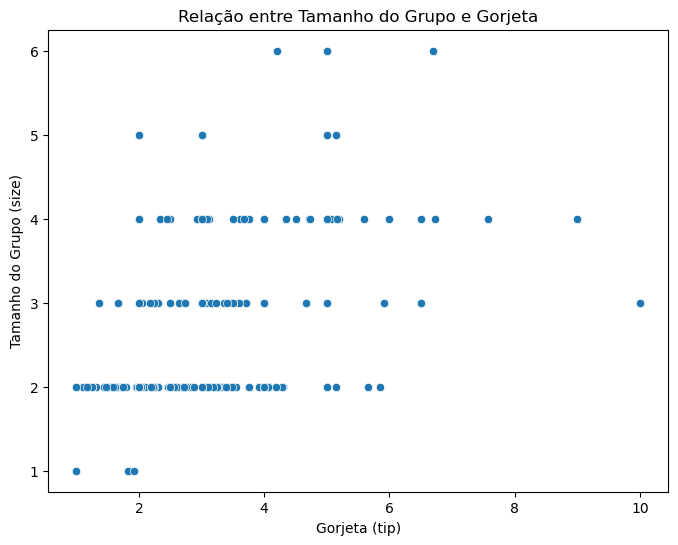

In [185]:
#scatter plot para relação de linearidade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tip', y='size', data=df)
plt.title('Relação entre Tamanho do Grupo e Gorjeta')
plt.xlabel('Gorjeta (tip)')
plt.ylabel('Tamanho do Grupo (size)')
plt.show()

### Correlação de Pearson

- Esta medida é utilizada para avaliar o relacionamento linear entre duas variáveis contínuas.
- É adequada quando os dados seguem uma distribuição normal e quando a relação entre as variáveis é linear.
- A correlação de Pearson varia de -1 a 1, onde -1 indica uma relação negativa perfeita, 0 indica ausência de correlação e 1 indica uma relação positiva perfeita

In [187]:
#correlação de Pearson
df_filter.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


- Um coeficiente de correlação de 0.4892 indica uma relação moderada positiva entre o tamanho do grupo e o valor da gorjeta. No entanto, **existe uma tendência de grupos maiores darem gorjetas maiores, mas a força dessa relação é moderada**, como é possível perceber no gráfico scatter plot.

### Homens ou mulheres tendem a dar gorjetas maiores?

In [202]:
#Primeiro, é necessário entender a quantidade de cada gênero para que a análise não seja 
count_sex = df['sex'].value_counts()
print("Quantidade de homens e mulheres que pagaram a conta:")
print(count_sex)

Quantidade de homens e mulheres que pagaram a conta:
sex
Male      157
Female     87
Name: count, dtype: int64


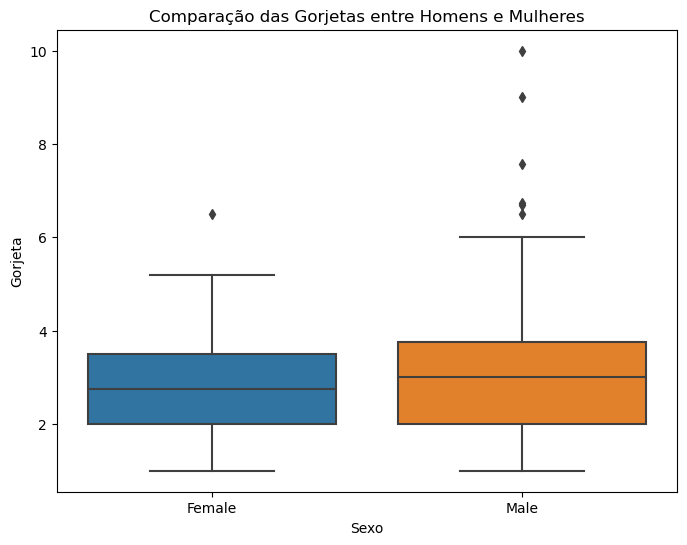

In [192]:
#Boxplot para entender a comparação entre homens e mulheres
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Comparação das Gorjetas entre Homens e Mulheres')
plt.xlabel('Sexo')
plt.ylabel('Gorjeta')
plt.show()

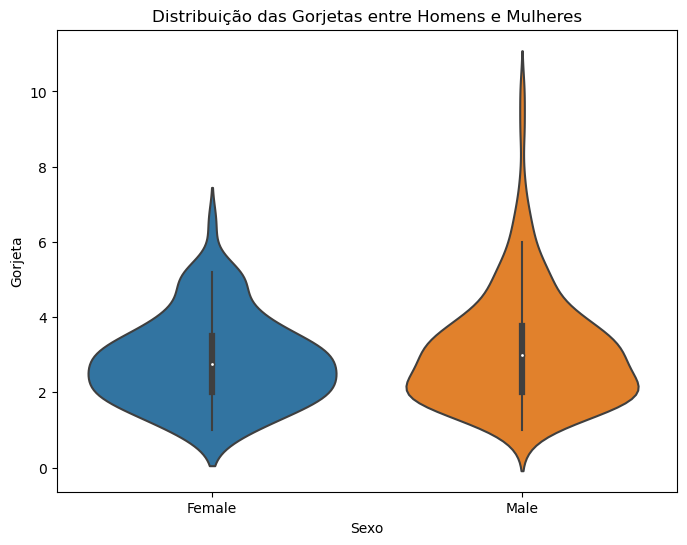

In [196]:
# Violin plot para entender a distribuição de maneira mais detalhada
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='tip', data=df)
plt.title('Distribuição das Gorjetas entre Homens e Mulheres')
plt.xlabel('Sexo')
plt.ylabel('Gorjeta')
plt.show()


### Análise
- No gráfico, é possível perceber que o gênero masculino tem uma quantidade maior de outliers e um valor máximo maior comparado ao gráfico feminino.
- Além disso, a barra referente à mediana do gráfico masculino está situada mais acima do que a do feminino, que se encontra mais centralizada. Isso indica que a distribuição do gráfico feminino é mais próxima da normal, enquanto o gráfico masculino tem a tendência para a esquerda (baixo).
- **Gorjetas dos Homens:** Tendem a ser mais variáveis, com algumas gorjetas excepcionalmente altas. A mediana é mais alta, mas a presença de muitos outliers indica uma ampla gama de valores.
- **Gorjetas das Mulheres:** Mais consistentes e centralizadas. A mediana é mais baixa e a distribuição é mais simétrica, indicando um comportamento de gorjeta mais previsível.


### Qual dia da semana recebe a maior média de gorjetas? O final de semana é afetado?

In [209]:
#agrupamento de dados por dia e tirar a mediana
mean_tips_by_day = df.groupby('day')['tip'].mean().reset_index()

print(mean_tips_by_day)

    day       tip
0   Fri  2.734737
1   Sat  2.993103
2   Sun  3.255132
3  Thur  2.771452


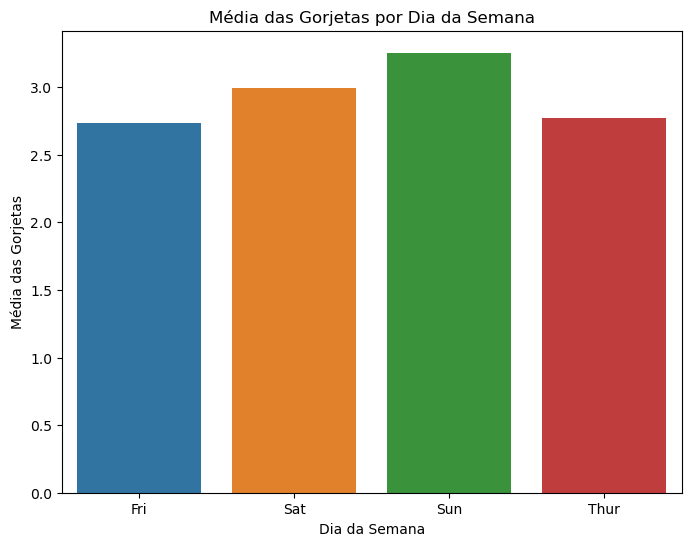

In [213]:
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=mean_tips_by_day)
plt.title('Média das Gorjetas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média das Gorjetas')
plt.show()

In [217]:
# Contagem de atendimentos por dia
count_by_day = df.groupby("day").size()
print(count_by_day)

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64


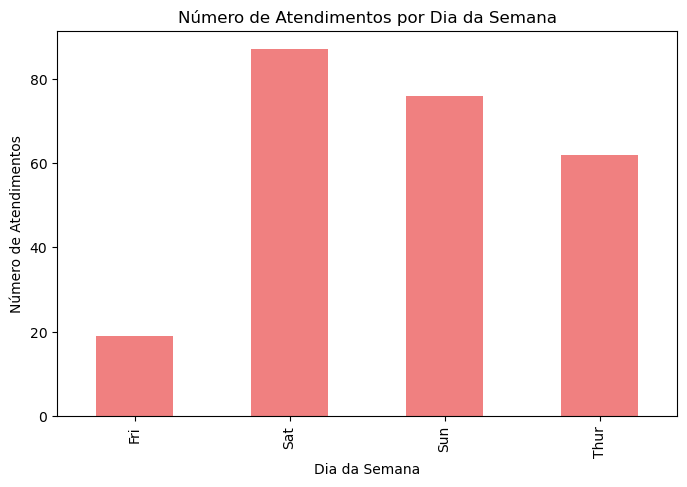

In [219]:
#gráfico sobre a quantidade de atendimentos
plt.figure(figsize=(8, 5))
count_by_day.plot(kind='bar', color='lightcoral')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Atendimentos')
plt.title('Número de Atendimentos por Dia da Semana')
plt.show()

### Análise
- Nos dias de semana os valores são similares (entre 2.73 e 2.77)
- No final de semana a média de gorjetas sobe, no sábado passa para 2.99 e domingo 3.25.
- Além disso, em conjunto com a quantidade de atendimentos, é possível perceber que finais de semana são mais rentáveis devido ao aumento da gorjeta e ao número de atendimentos em comparação à semana.

### Existe uma diferença significativa entre o valor da gorjeta no almoço e no jantar?

In [222]:
#separando os dados por refeição
lunch_tips = df[df['time'] == 'Lunch']['tip']
dinner_tips = df[df['time'] == 'Dinner']['tip']

In [224]:
lunch_mean = lunch_tips.mean()
dinner_mean = dinner_tips.mean()
lunch_std = lunch_tips.std()
dinner_std = dinner_tips.std()

print(f"Média da gorjeta no almoço: {lunch_mean:.2f}")
print(f"Desvio padrão da gorjeta no almoço: {lunch_std:.2f}")
print(f"Média da gorjeta no jantar: {dinner_mean:.2f}")
print(f"Desvio padrão da gorjeta no jantar: {dinner_std:.2f}")

Média da gorjeta no almoço: 2.73
Desvio padrão da gorjeta no almoço: 1.21
Média da gorjeta no jantar: 3.10
Desvio padrão da gorjeta no jantar: 1.44


### Análise
- A média da gorjeta é maior no jantar (3.10) em comparação com o almoço ($2.73). Isso sugere que, em média, as gorjetas são mais altas durante o jantar.
- O desvio padrão é maior para o jantar, indicando que há uma maior variabilidade nas gorjetas durante o jantar em comparação com o almoço.

In [232]:
t_stat, p_value = stats.ttest_ind(lunch_tips, dinner_tips)

print(f"Estatística t: {t_stat:.2f}")
print(f"Valor-p: {p_value:.4f}")

Estatística t: -1.91
Valor-p: 0.0578


### Análise teste T
- O valor de -1.91 indica que a média das gorjetas no jantar é significativamente diferente da média das gorjetas no almoço. A negatividade sugere que a média das gorjetas no jantar é maior do que no almoço que é consistente com os valores anteriores.
- O valor-p de 0.0578 é um pouco maior que 0.05, o que indica que a diferença nas médias das gorjetas entre almoço e jantar não é estatisticamente significativa, então não podemos concluir que há uma diferença significativa nas gorjetas entre almoço e jantar.

### Clientes fumantes dão gorjetas diferentes em comparação com clientes não fumantes?

In [238]:
#separar fumantes de não fumantes
smoking_tips = df[df['smoker'] == 'Yes']['tip']
non_smoking_tips = df[df['smoker'] == 'No']['tip']

In [240]:
# Calcular estatísticas descritivas
smoking_mean = smoking_tips.mean()
non_smoking_mean = non_smoking_tips.mean()
smoking_std = smoking_tips.std()
non_smoking_std = non_smoking_tips.std()

print(f"Média da gorjeta para fumantes: {smoking_mean:.2f}")
print(f"Desvio padrão da gorjeta para fumantes: {smoking_std:.2f}")
print(f"Média da gorjeta para não fumantes: {non_smoking_mean:.2f}")
print(f"Desvio padrão da gorjeta para não fumantes: {non_smoking_std:.2f}")

Média da gorjeta para fumantes: 3.01
Desvio padrão da gorjeta para fumantes: 1.40
Média da gorjeta para não fumantes: 2.99
Desvio padrão da gorjeta para não fumantes: 1.38


In [242]:
t_stat, p_value = stats.ttest_ind(smoking_tips, non_smoking_tips)

print(f"Estatística t: {t_stat:.2f}")
print(f"Valor-p: {p_value:.4f}")

Estatística t: 0.09
Valor-p: 0.9266


<Figure size 1000x600 with 0 Axes>

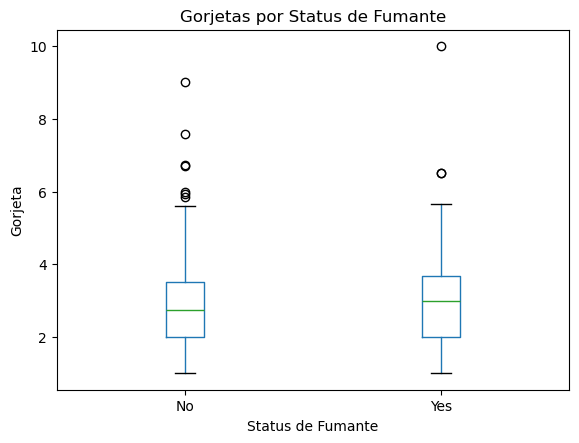

In [252]:
# Criar gráfico de boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='tip', by='smoker', grid=False)
plt.title('Gorjetas por Status de Fumante')
plt.suptitle('')  # Remove o título padrão
plt.xlabel('Status de Fumante')
plt.ylabel('Gorjeta')
plt.show()

### Análise
- A diferença nas médias das gorjetas entre fumantes e não fumantes é muito pequena, com uma diferença de apenas $0,02, que pode ser não significativa.
- O valor da estatística t de 0.09 sugere que a diferença observada nas médias das gorjetas é muito pequena em relação à variabilidade dos dados.
- O valor-p de 0.9266 é muito maior do que o nível de significância comum de 0.05. Isso indica que a diferença nas gorjetas entre fumantes e não fumantes não é estatisticamente significativa.

## 3. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

- Existe uma tendência de que o valor da gorjeta cresce de acordo com o valor total da conta.
- Além disso, existe uma tendência de grupos maiores darem gorjetas maiores, mas a força dessa relação é moderada.
- Gorjetas dos Homens: Tendem a ser mais variáveis, com algumas gorjetas excepcionalmente altas. A mediana é mais alta, mas a presença de muitos outliers indica uma ampla gama de valores.
- Gorjetas das Mulheres: Mais consistentes e centralizadas. A mediana é mais baixa e a distribuição é mais simétrica, indicando um comportamento de gorjeta mais previsível.
- Entre os clientes, tiveram 70 homens a mais que mulheres, o que pode impactar em alguma análise preditiva futura.
- O número de atendimentos é maior no final de semana.
- O valor da gorjeta é maior nos dias de final de semana e isso, em conjunto com a quantidade de atendimentos, indica que o garçom tem uma remuneração maior aos finais de semana.
- A diferença nas médias das gorjetas entre almoço e jantar não é estatisticamente significativa, então não podemos concluir que há uma diferença significativa nas gorjetas entre almoço e jantar.
- A diferença das gorjetas entre clientes fumantes e não fumantes não é estatisticamente significativa.